# Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


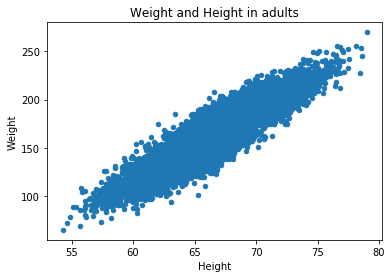

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

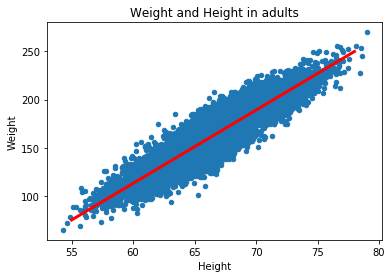

In [6]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [7]:
def line(x, w=0, b=0):
    return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [10]:
yhat = line(x, w=0, b=0)

In [11]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

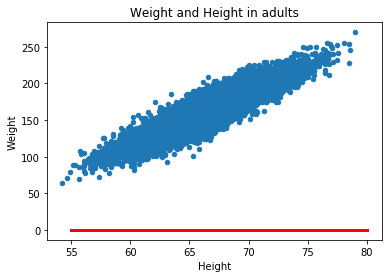

In [12]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [13]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [14]:
X = df[['Height']].values
y_true = df['Weight'].values

In [15]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [16]:
y_pred = line(X)

In [17]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5,0,'b')

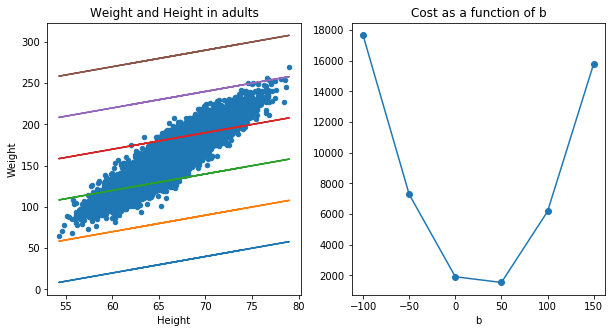

In [19]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [21]:
model = Sequential()

In [22]:
model.add(Dense(1, input_shape=(1,)))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [25]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 32us/step - loss: 1107.2952
Epoch 2/40
10000/10000 [==============================] - 0s 19us/step - loss: 548.6024
Epoch 3/40
10000/10000 [==============================] - 0s 19us/step - loss: 522.8387
Epoch 4/40
10000/10000 [==============================] - 0s 18us/step - loss: 485.4142
Epoch 5/40
10000/10000 [==============================] - 0s 21us/step - loss: 439.3846
Epoch 6/40
10000/10000 [==============================] - 0s 19us/step - loss: 404.4326
Epoch 7/40
10000/10000 [==============================] - 0s 20us/step - loss: 362.1822
Epoch 8/40
10000/10000 [==============================] - 0s 19us/step - loss: 333.3880
Epoch 9/40
10000/10000 [==============================] - 0s 19us/step - loss: 326.3777
Epoch 10/40
10000/10000 [==============================] - 0s 18us/step - loss: 270.5907
Epoch 11/40
10000/10000 [==============================] - 0s 18us/step - loss: 249.7303
Epoch 12/40
10000/10000 [====

In [26]:
y_pred = model.predict(X)

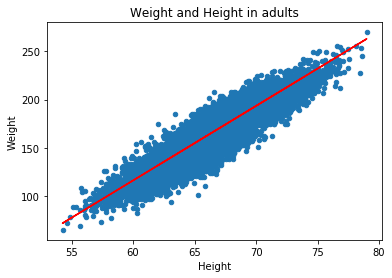

In [27]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [28]:
W, B = model.get_weights()

In [29]:
W

array([[7.741885]], dtype=float32)

In [30]:
B

array([-348.4587], dtype=float32)

## Evaluating Model Performance

In [31]:
from sklearn.metrics import r2_score

In [32]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.840


### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [35]:
len(X_train)

8000

In [36]:
len(X_test)

2000

In [37]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [38]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [39]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [40]:
from sklearn.metrics import mean_squared_error as mse

In [41]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	173.7
The Mean Squared Error on the Test set is:	165.2


In [42]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.831
The R2 score on the Test set is:	0.841


# Classification

In [43]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [44]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


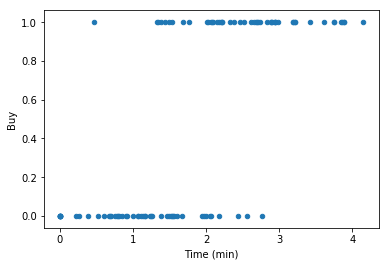

In [45]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [46]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [47]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 1ms/step - loss: 0.6705 - acc: 0.5600
Epoch 2/25
100/100 [==============================] - 0s 58us/step - loss: 0.6270 - acc: 0.6500
Epoch 3/25
100/100 [==============================] - 0s 49us/step - loss: 0.6024 - acc: 0.7300
Epoch 4/25
100/100 [==============================] - 0s 46us/step - loss: 0.5346 - acc: 0.7900
Epoch 5/25
100/100 [==============================] - 0s 45us/step - loss: 0.5146 - acc: 0.7500
Epoch 6/25
100/100 [==============================] - 0s 45us/step - loss: 0.5125 - acc: 0.7800
Epoch 7/25
100/100 [==============================] - 0s 48us/step - loss: 0.4872 - acc: 0.7700
Epoch 8/25
100/100 [==============================] - 0s 41us/step - loss: 0.4726 - acc: 0.8100
Epoch 9/25
100/100 [==============================] - 0s 44us/step - loss: 0.4658 - acc: 0.8000
Epoch 10/25
100/100 [==============================] - 0s 44us/step - loss: 0.4568 - acc: 0.7900
Epoch 11/25
100/100 [===================

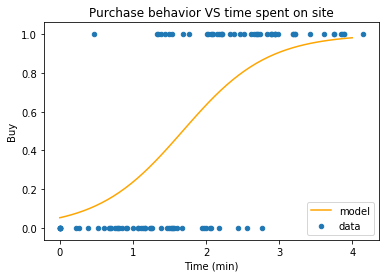

In [50]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [51]:
temp_class = model.predict(temp) > 0.5

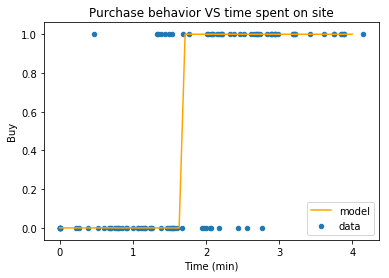

In [52]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [53]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.840


### Train/Test split


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [58]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [59]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [60]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.825
The test accuracy score is 0.800


## Cross Validation

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier

In [62]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [63]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [64]:
from sklearn.model_selection import cross_val_score, KFold

In [65]:
cv = KFold(3, shuffle=True)

In [66]:
scores = cross_val_score(model, X, y, cv=cv)

In [67]:
scores

array([0.76470588, 0.78787879, 0.87878788])

In [68]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8105 ± 0.0492


## Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 7, 43]])

In [71]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [72]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,7,43


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [74]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.827
Recall:  	0.860
F1 Score:	0.843


In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84        50
          1       0.83      0.86      0.84        50

avg / total       0.84      0.84      0.84       100



## Feature Preprocessing

### Categorical Features

In [77]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [78]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [80]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [81]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [82]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


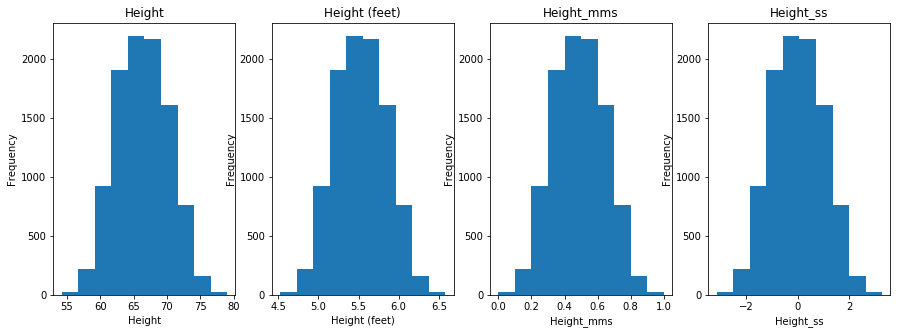

In [84]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

### Load the dataset and inspect it

In [85]:
housing = pd.read_csv('../data/housing-data.csv')

In [86]:
housing.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [87]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [88]:
housing.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


### Plot histogram for each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12408bb70>,
      dtype=object)

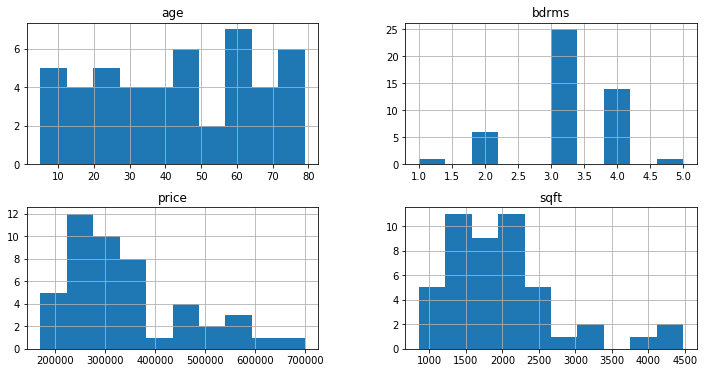

In [89]:
housing.hist(figsize=(12, 6))

### Let's create the model

In [90]:
housingModel = Sequential()

In [91]:
# 3 input features. 1 output = price
housingModel.add(Dense(1, input_shape=(3,)))

In [92]:
housingModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### Train/Test split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = housing.drop('price', axis=1).values
y = housing['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
housingModel.compile(Adam(), 'mean_squared_error')

In [96]:
housingModel.fit(X_train, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 0s 5ms/step - loss: 140111241437.4054
Epoch 2/50
37/37 [==============================] - 0s 91us/step - loss: 140107968844.1081
Epoch 3/50
37/37 [==============================] - 0s 125us/step - loss: 140104658611.8919
Epoch 4/50
37/37 [==============================] - 0s 131us/step - loss: 140101385354.3784
Epoch 5/50
37/37 [==============================] - 0s 109us/step - loss: 140098227227.6757
Epoch 6/50
37/37 [==============================] - 0s 109us/step - loss: 140094851238.0540
Epoch 7/50
37/37 [==============================] - 0s 81us/step - loss: 140091784773.1892
Epoch 8/50
37/37 [==============================] - 0s 182us/step - loss: 140088555796.7567
Epoch 9/50
37/37 [==============================] - 0s 137us/step - loss: 140085410732.9730
Epoch 10/50
37/37 [==============================] - 0s 86us/step - loss: 140082146995.8919
Epoch 11/50
37/37 [==============================] - 0s 77us/step - loss: 1400790650

Even though the loss is decreasing, notice the huge loss value

### Let's scale the features

In [97]:
housing.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [98]:
scaled_X = pd.DataFrame()
scaled_X['sqft'] = housing['sqft'] / 1000
scaled_X['bdrms'] = housing['bdrms'] # no need to scale down
scaled_X['age'] = housing['age'] / 10
scaled_y = housing['price'] / 1e5

... and repeat the training

In [99]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2)

In [100]:
def createCompileFitModel(X_train, y_train, learning_rate=0.001, epochs=100):
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    model.compile(Adam(lr=learning_rate), 'mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs)
    
    return model

In [101]:
housingModel = createCompileFitModel(X_train, y_train)

Epoch 1/100
37/37 [==============================] - 0s 4ms/step - loss: 2.5958
Epoch 2/100
37/37 [==============================] - 0s 92us/step - loss: 2.5608
Epoch 3/100
37/37 [==============================] - 0s 99us/step - loss: 2.5205
Epoch 4/100
37/37 [==============================] - 0s 81us/step - loss: 2.4856
Epoch 5/100
37/37 [==============================] - 0s 77us/step - loss: 2.4473
Epoch 6/100
37/37 [==============================] - 0s 94us/step - loss: 2.4155
Epoch 7/100
37/37 [==============================] - 0s 90us/step - loss: 2.3796
Epoch 8/100
37/37 [==============================] - 0s 70us/step - loss: 2.3472
Epoch 9/100
37/37 [==============================] - 0s 83us/step - loss: 2.3140
Epoch 10/100
37/37 [==============================] - 0s 81us/step - loss: 2.2817
Epoch 11/100
37/37 [==============================] - 0s 103us/step - loss: 2.2514
Epoch 12/100
37/37 [==============================] - 0s 89us/step - loss: 2.2214
Epoch 13/100
37/37 [=====

37/37 [==============================] - 0s 138us/step - loss: 1.4135


### Evaluating performance using R2 score

In [102]:
from sklearn.metrics import r2_score

In [103]:
y_pred = housingModel.predict(X_test)

In [104]:
print("The R2 score is {:0.3f}".format(r2_score(y_test, y_pred)))

The R2 score is 0.722


Let's try different learning rate

In [105]:
housingModel = createCompileFitModel(X_train, y_train, learning_rate=0.008)

Epoch 1/100
37/37 [==============================] - 0s 7ms/step - loss: 89.7165
Epoch 2/100
37/37 [==============================] - 0s 85us/step - loss: 86.7740
Epoch 3/100
37/37 [==============================] - 0s 183us/step - loss: 83.6004
Epoch 4/100
37/37 [==============================] - 0s 96us/step - loss: 80.5496
Epoch 5/100
37/37 [==============================] - 0s 97us/step - loss: 77.5301
Epoch 6/100
37/37 [==============================] - 0s 91us/step - loss: 74.6007
Epoch 7/100
37/37 [==============================] - 0s 164us/step - loss: 71.7495
Epoch 8/100
37/37 [==============================] - 0s 96us/step - loss: 68.8744
Epoch 9/100
37/37 [==============================] - 0s 103us/step - loss: 66.0959
Epoch 10/100
37/37 [==============================] - 0s 105us/step - loss: 63.4863
Epoch 11/100
37/37 [==============================] - 0s 103us/step - loss: 60.8701
Epoch 12/100
37/37 [==============================] - 0s 103us/step - loss: 58.3070
Epoch 13

37/37 [==============================] - 0s 114us/step - loss: 1.0030
Epoch 100/100
37/37 [==============================] - 0s 98us/step - loss: 0.9887


In [106]:
y_pred = housingModel.predict(X_test)
print("The R2 score is {:0.3f}".format(r2_score(y_test, y_pred)))

The R2 score is 0.763


Increasing the learning rate and number of epochs

In [107]:
housingModel = createCompileFitModel(X_train, y_train, learning_rate=0.01, epochs=500)

Epoch 1/500
37/37 [==============================] - 0s 5ms/step - loss: 73.0348
Epoch 2/500
37/37 [==============================] - 0s 95us/step - loss: 69.3175
Epoch 3/500
37/37 [==============================] - 0s 171us/step - loss: 65.8888
Epoch 4/500
37/37 [==============================] - 0s 86us/step - loss: 62.4963
Epoch 5/500
37/37 [==============================] - 0s 82us/step - loss: 59.2349
Epoch 6/500
37/37 [==============================] - 0s 114us/step - loss: 56.0670
Epoch 7/500
37/37 [==============================] - 0s 79us/step - loss: 53.0408
Epoch 8/500
37/37 [==============================] - 0s 78us/step - loss: 50.0409
Epoch 9/500
37/37 [==============================] - 0s 115us/step - loss: 47.2750
Epoch 10/500
37/37 [==============================] - 0s 146us/step - loss: 44.5663
Epoch 11/500
37/37 [==============================] - 0s 62us/step - loss: 41.9375
Epoch 12/500
37/37 [==============================] - 0s 121us/step - loss: 39.4168
Epoch 13/

Epoch 100/500
37/37 [==============================] - 0s 101us/step - loss: 1.2216
Epoch 101/500
37/37 [==============================] - 0s 133us/step - loss: 1.2177
Epoch 102/500
37/37 [==============================] - 0s 104us/step - loss: 1.2139
Epoch 103/500
37/37 [==============================] - 0s 124us/step - loss: 1.2112
Epoch 104/500
37/37 [==============================] - 0s 98us/step - loss: 1.2080
Epoch 105/500
37/37 [==============================] - 0s 130us/step - loss: 1.2046
Epoch 106/500
37/37 [==============================] - 0s 111us/step - loss: 1.2013
Epoch 107/500
37/37 [==============================] - 0s 97us/step - loss: 1.1987
Epoch 108/500
37/37 [==============================] - 0s 138us/step - loss: 1.1968
Epoch 109/500
37/37 [==============================] - 0s 80us/step - loss: 1.1928
Epoch 110/500
37/37 [==============================] - 0s 100us/step - loss: 1.1888
Epoch 111/500
37/37 [==============================] - 0s 93us/step - loss: 1.1

37/37 [==============================] - 0s 151us/step - loss: 0.9374
Epoch 199/500
37/37 [==============================] - 0s 119us/step - loss: 0.9347
Epoch 200/500
37/37 [==============================] - 0s 80us/step - loss: 0.9322
Epoch 201/500
37/37 [==============================] - 0s 81us/step - loss: 0.9288
Epoch 202/500
37/37 [==============================] - 0s 200us/step - loss: 0.9263
Epoch 203/500
37/37 [==============================] - 0s 127us/step - loss: 0.9237
Epoch 204/500
37/37 [==============================] - 0s 110us/step - loss: 0.9212
Epoch 205/500
37/37 [==============================] - 0s 128us/step - loss: 0.9183
Epoch 206/500
37/37 [==============================] - 0s 181us/step - loss: 0.9157
Epoch 207/500
37/37 [==============================] - 0s 112us/step - loss: 0.9129
Epoch 208/500
37/37 [==============================] - 0s 114us/step - loss: 0.9104
Epoch 209/500
37/37 [==============================] - 0s 126us/step - loss: 0.9078
Epoch 21

37/37 [==============================] - 0s 81us/step - loss: 0.7580
Epoch 297/500
37/37 [==============================] - 0s 67us/step - loss: 0.7565
Epoch 298/500
37/37 [==============================] - 0s 127us/step - loss: 0.7551
Epoch 299/500
37/37 [==============================] - 0s 150us/step - loss: 0.7540
Epoch 300/500
37/37 [==============================] - 0s 71us/step - loss: 0.7531
Epoch 301/500
37/37 [==============================] - 0s 151us/step - loss: 0.7514
Epoch 302/500
37/37 [==============================] - 0s 135us/step - loss: 0.7502
Epoch 303/500
37/37 [==============================] - 0s 98us/step - loss: 0.7484
Epoch 304/500
37/37 [==============================] - 0s 126us/step - loss: 0.7480
Epoch 305/500
37/37 [==============================] - 0s 117us/step - loss: 0.7468
Epoch 306/500
37/37 [==============================] - 0s 69us/step - loss: 0.7463
Epoch 307/500
37/37 [==============================] - 0s 94us/step - loss: 0.7448
Epoch 308/50

37/37 [==============================] - 0s 86us/step - loss: 0.6564
Epoch 395/500
37/37 [==============================] - 0s 89us/step - loss: 0.6555
Epoch 396/500
37/37 [==============================] - 0s 108us/step - loss: 0.6548
Epoch 397/500
37/37 [==============================] - 0s 107us/step - loss: 0.6538
Epoch 398/500
37/37 [==============================] - 0s 119us/step - loss: 0.6528
Epoch 399/500
37/37 [==============================] - 0s 114us/step - loss: 0.6516
Epoch 400/500
37/37 [==============================] - 0s 86us/step - loss: 0.6516
Epoch 401/500
37/37 [==============================] - 0s 115us/step - loss: 0.6530
Epoch 402/500
37/37 [==============================] - 0s 99us/step - loss: 0.6530
Epoch 403/500
37/37 [==============================] - 0s 90us/step - loss: 0.6542
Epoch 404/500
37/37 [==============================] - 0s 110us/step - loss: 0.6530
Epoch 405/500
37/37 [==============================] - 0s 104us/step - loss: 0.6512
Epoch 406/5

37/37 [==============================] - 0s 83us/step - loss: 0.5825
Epoch 493/500
37/37 [==============================] - 0s 99us/step - loss: 0.5815
Epoch 494/500
37/37 [==============================] - 0s 79us/step - loss: 0.5805
Epoch 495/500
37/37 [==============================] - 0s 143us/step - loss: 0.5801
Epoch 496/500
37/37 [==============================] - 0s 126us/step - loss: 0.5786
Epoch 497/500
37/37 [==============================] - 0s 113us/step - loss: 0.5787
Epoch 498/500
37/37 [==============================] - 0s 105us/step - loss: 0.5787
Epoch 499/500
37/37 [==============================] - 0s 103us/step - loss: 0.5776
Epoch 500/500
37/37 [==============================] - 0s 93us/step - loss: 0.5768


In [108]:
y_pred = housingModel.predict(X_test)
print("The R2 score is {:0.3f}".format(r2_score(y_test, y_pred)))

The R2 score is 0.723


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [150]:
hr = pd.read_csv('../data/HR_comma_sep.csv')

In [151]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [152]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [153]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Establish benchmark

In [155]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [157]:
# Predicting everybody stays => employees who didn't leave / total of employees
11428 / 14999

0.7619174611640777

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a1e7cf8>,
      dtype=object)

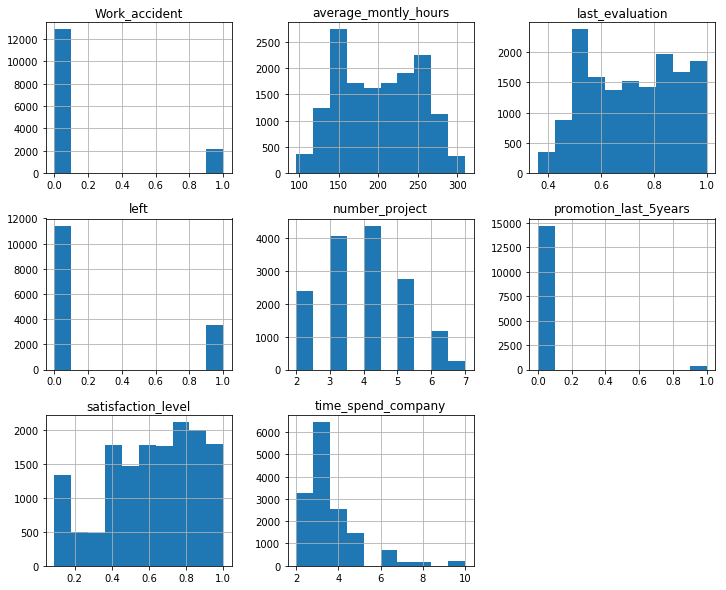

In [158]:
hr.hist(figsize=(12,10))

Let's rescale **average_montly_hours**

In [159]:
hr['average_montly_hours'] = hr['average_montly_hours'] / 100

In [160]:
hr['average_montly_hours'].describe()

count    14999.000000
mean         2.010503
std          0.499431
min          0.960000
25%          1.560000
50%          2.000000
75%          2.450000
max          3.100000
Name: average_montly_hours, dtype: float64

### Convert the categorical features into binary dummy columns

In [161]:
hrDummies = pd.get_dummies(hr)

### Train/Test split

In [162]:
X = hrDummies.drop('left', axis=1)
y = hrDummies['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [163]:
def createCompileFitModelHR(X_train, y_train, learning_rate=0.001, epochs=100):
    num_features = len(X_train.columns)
    
    model = Sequential()
    model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))
    model.compile(Adam(lr=learning_rate), 'binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs)
    
    return model

In [169]:
hr = createCompileFitModelHR(X_train, y_train)

Epoch 1/100
11999/11999 [==============================] - 1s 48us/step - loss: 0.7401 - acc: 0.5545
Epoch 2/100
11999/11999 [==============================] - 0s 27us/step - loss: 0.5724 - acc: 0.7615
Epoch 3/100
11999/11999 [==============================] - 0s 28us/step - loss: 0.5506 - acc: 0.7615
Epoch 4/100
11999/11999 [==============================] - 0s 27us/step - loss: 0.5307 - acc: 0.7615
Epoch 5/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.5137 - acc: 0.7615
Epoch 6/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.5000 - acc: 0.7612
Epoch 7/100
11999/11999 [==============================] - 0s 28us/step - loss: 0.4891 - acc: 0.7595
Epoch 8/100
11999/11999 [==============================] - 0s 27us/step - loss: 0.4799 - acc: 0.7575
Epoch 9/100
11999/11999 [==============================] - 0s 27us/step - loss: 0.4725 - acc: 0.7546
Epoch 10/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.4664 - a

11999/11999 [==============================] - 0s 26us/step - loss: 0.4276 - acc: 0.7919
Epoch 81/100
11999/11999 [==============================] - 0s 27us/step - loss: 0.4275 - acc: 0.7919
Epoch 82/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.4274 - acc: 0.7936
Epoch 83/100
11999/11999 [==============================] - 0s 25us/step - loss: 0.4274 - acc: 0.7924
Epoch 84/100
11999/11999 [==============================] - 0s 25us/step - loss: 0.4275 - acc: 0.7920
Epoch 85/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.4273 - acc: 0.7928
Epoch 86/100
11999/11999 [==============================] - 0s 25us/step - loss: 0.4274 - acc: 0.7927
Epoch 87/100
11999/11999 [==============================] - 0s 25us/step - loss: 0.4275 - acc: 0.7946
Epoch 88/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.4274 - acc: 0.7923
Epoch 89/100
11999/11999 [==============================] - 0s 26us/step - loss: 0.4273 - acc: 

In [170]:
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
# y_pred = hr.predict(X_test) > 0.5
y_pred = hr.predict_classes(X_test)

In [194]:
print(confusion_matrix(y_test, y_pred))

[[2131  160]
 [ 469  240]]


In [195]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      2291
          1       0.60      0.34      0.43       709

avg / total       0.77      0.79      0.77      3000



### Using 5-Fold cross validation

In [200]:
def build_logistic_regression_model_v2():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])
    return model

In [201]:
model2 = KerasClassifier(build_fn=build_logistic_regression_model_v2, epochs=100, verbose=0)

In [202]:
cv5 = KFold(5, shuffle=True)

In [203]:
scores2 = cross_val_score(model2, X, y, cv=cv5)

In [204]:
scores2

array([0.78633333, 0.807     , 0.78366667, 0.78      , 0.79493164])

In [205]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores2.mean(), scores2.std()))

The cross validation accuracy is 0.7904 ± 0.0097


**Does the model perform good enough?** _Benchmark_: 0.76, _Accuracy_: 0.79. Yes, it does ;-)